### Jupyter notebook demo from Python Tri-Cities, WA interest group

In this notebook we will work with some data from Wikipedia, specifically
the US Cities by population located here:
https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population

Always remember data is never clean!

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

Now lets import the data into what is called a data frame, or df for short.

In [4]:
df = pd.read_table('data/2016_city_data2')

In [5]:
df.head()

,,2016 rank,City,State[5],2016 estimate,2010 Census,Change,2016 land area,2016 population density,Location
1,New York[6],New York,"8,537,673","8,175,133",+4.43%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40.6635°N 73.9387°W
2,Los Angeles,California,"3,976,322","3,792,621",+4.84%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34.0194°N 118.4108°W
3,Chicago,Illinois,"2,704,958","2,695,598",+0.35%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41.8376°N 87.6818°W
4,Houston[7],Texas,"2,303,482","2,100,263",+9.68%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29.7866°N 95.3909°W
5,Phoenix,Arizona,"1,615,017","1,445,632",+11.72%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33.5722°N 112.0901°W


So we have some data, now let's look at the columns, and determine why they don't line up.

In [6]:
df.columns

Index(['2016 rank ', 'City ', 'State[5] ', '2016 estimate ', '2010 Census ',
       'Change ', '2016 land area ', '2016 population density ', 'Location'],
      dtype='object')

In [7]:
len(df.columns)

9

So it looks like we have 9 columns, lets look at the "zeroth" location to see what that looks like

In [8]:
df.iloc[0]

2016 rank                             New York 
City                                 8,537,673 
State[5]                             8,175,133 
2016 estimate                           +4.43% 
2010 Census                        301.5 sq mi 
Change                               780.9 km2 
2016 land area                    28,317/sq mi 
2016 population density             10,933/km2 
Location                    40.6635°N 73.9387°W
Name: (1, New York[6] ), dtype: object

So it appears that the Name row has a multilevel index, that is 2 values (1, New York[6] )
let's look closer at the index.

In [9]:
# df.index

In [10]:
df = df.reset_index(level=1)

In [11]:
df.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            298, 299, 300, 301, 302, 303, 304, 305, 306, 307],
           dtype='int64', length=307)

In [12]:
df.head()

,level_1,2016 rank,City,State[5],2016 estimate,2010 Census,Change,2016 land area,2016 population density,Location
1,New York[6],New York,"8,537,673","8,175,133",+4.43%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40.6635°N 73.9387°W
2,Los Angeles,California,"3,976,322","3,792,621",+4.84%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34.0194°N 118.4108°W
3,Chicago,Illinois,"2,704,958","2,695,598",+0.35%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41.8376°N 87.6818°W
4,Houston[7],Texas,"2,303,482","2,100,263",+9.68%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29.7866°N 95.3909°W
5,Phoenix,Arizona,"1,615,017","1,445,632",+11.72%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33.5722°N 112.0901°W


In [13]:
len(df.columns)

10

In [14]:
# df.index.names = ['2016_rank']

In [15]:
# df.head()

In [16]:
new_col = ['city', 
           'state', 
           '2016 estimated', 
           '2010 census',
           'percent change', 
           '2016 land area mi2',
           '2016 land area km2',
           '2016 population density per mi2', 
           '2016 population density per km2',
           'location']

In [17]:
len(new_col)

10

In [18]:
df.columns = new_col

In [19]:
df.head()

,city,state,2016 estimated,2010 census,percent change,2016 land area mi2,2016 land area km2,2016 population density per mi2,2016 population density per km2,location
1,New York[6],New York,"8,537,673","8,175,133",+4.43%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40.6635°N 73.9387°W
2,Los Angeles,California,"3,976,322","3,792,621",+4.84%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34.0194°N 118.4108°W
3,Chicago,Illinois,"2,704,958","2,695,598",+0.35%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41.8376°N 87.6818°W
4,Houston[7],Texas,"2,303,482","2,100,263",+9.68%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29.7866°N 95.3909°W
5,Phoenix,Arizona,"1,615,017","1,445,632",+11.72%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33.5722°N 112.0901°W


In [20]:
df.sort_values(by=['2010 census'], ascending=False)

,city,state,2016 estimated,2010 census,percent change,2016 land area mi2,2016 land area km2,2016 population density per mi2,2016 population density per km2,location
298,Edison[32],New Jersey,"101,996","99,967",+2.03%,30.1 sq mi,78.0 km2,"3,389/sq mi","1,309/km2",40.5040°N 74.3494°W
234,Odessa,Texas,"117,871","99,940",+17.94%,45.2 sq mi,117.1 km2,"2,608/sq mi","1,007/km2",31.8838°N 102.3411°W
275,West Palm Beach,Florida,"108,161","99,919",+8.25%,55.1 sq mi,142.7 km2,"1,963/sq mi",758/km2,26.7464°N 80.1251°W
227,Round Rock,Texas,"120,892","99,887",+21.03%,35.6 sq mi,92.2 km2,"3,396/sq mi","1,311/km2",30.5252°N 97.6660°W
271,Pompano Beach,Florida,"109,393","99,845",+9.56%,24.0 sq mi,62.2 km2,"4,558/sq mi","1,760/km2",26.2416°N 80.1339°W
296,Davenport,Iowa,"102,612","99,685",+2.94%,62.9 sq mi,162.9 km2,"1,631/sq mi",630/km2,41.5541°N 90.6040°W
303,Woodbridge[32],New Jersey,"101,389","99,585",+1.81%,23.3 sq mi,60.3 km2,"4,351/sq mi","1,680/km2",40.5607°N 74.2927°W
282,Santa Maria,California,"106,290","99,553",+6.77%,22.8 sq mi,59.1 km2,"4,662/sq mi","1,800/km2",34.9332°N 120.4438°W
293,El Cajon,California,"103,768","99,478",+4.31%,14.5 sq mi,37.6 km2,"7,156/sq mi","2,763/km2",32.8017°N 116.9604°W
250,Richardson,Texas,"113,347","99,223",+14.23%,28.6 sq mi,74.1 km2,"3,963/sq mi","1,530/km2",32.9723°N 96.7081°W


Something is not right with this sort, what could it be, maybe the columns are not numbers.

In [21]:
df.dtypes

city                               object
state                              object
2016 estimated                     object
2010 census                        object
percent change                     object
2016 land area mi2                 object
2016 land area km2                 object
2016 population density per mi2    object
2016 population density per km2    object
location                           object
dtype: object

In [22]:
df['2016 estimated'] = df['2016 estimated'].str.replace(',', '').astype(int)

In [23]:
df['2010 census'] = df['2010 census'].str.replace(',', '').astype(int)

In [24]:
df.head()

,city,state,2016 estimated,2010 census,percent change,2016 land area mi2,2016 land area km2,2016 population density per mi2,2016 population density per km2,location
1,New York[6],New York,8537673,8175133,+4.43%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40.6635°N 73.9387°W
2,Los Angeles,California,3976322,3792621,+4.84%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34.0194°N 118.4108°W
3,Chicago,Illinois,2704958,2695598,+0.35%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41.8376°N 87.6818°W
4,Houston[7],Texas,2303482,2100263,+9.68%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29.7866°N 95.3909°W
5,Phoenix,Arizona,1615017,1445632,+11.72%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33.5722°N 112.0901°W


In [25]:
df.dtypes

city                               object
state                              object
2016 estimated                      int64
2010 census                         int64
percent change                     object
2016 land area mi2                 object
2016 land area km2                 object
2016 population density per mi2    object
2016 population density per km2    object
location                           object
dtype: object

In [26]:
df.sort_values(by=['2010 census'], ascending=False)

,city,state,2016 estimated,2010 census,percent change,2016 land area mi2,2016 land area km2,2016 population density per mi2,2016 population density per km2,location
1,New York[6],New York,8537673,8175133,+4.43%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40.6635°N 73.9387°W
2,Los Angeles,California,3976322,3792621,+4.84%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34.0194°N 118.4108°W
3,Chicago,Illinois,2704958,2695598,+0.35%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41.8376°N 87.6818°W
4,Houston[7],Texas,2303482,2100263,+9.68%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29.7866°N 95.3909°W
6,Philadelphia[8],Pennsylvania,1567872,1526006,+2.74%,134.2 sq mi,347.6 km2,"11,683/sq mi","4,511/km2",40.0094°N 75.1333°W
5,Phoenix,Arizona,1615017,1445632,+11.72%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33.5722°N 112.0901°W
7,San Antonio,Texas,1492510,1327407,+12.44%,461.0 sq mi,"1,194.0 km2","3,238/sq mi","1,250/km2",29.4724°N 98.5251°W
8,San Diego,California,1406630,1307402,+7.59%,325.2 sq mi,842.3 km2,"4,325/sq mi","1,670/km2",32.8153°N 117.1350°W
9,Dallas,Texas,1317929,1197816,+10.03%,340.9 sq mi,882.9 km2,"3,866/sq mi","1,493/km2",32.7933°N 96.7665°W
10,San Jose,California,1025350,945942,+8.39%,177.5 sq mi,459.7 km2,"5,777/sq mi","2,231/km2",37.2967°N 121.8189°W


So let's verfiy the data in the percent change columm.

In [27]:
df['increase'] = df['2016 estimated'] - df['2010 census']

In [28]:
df.head()

,city,state,2016 estimated,2010 census,percent change,2016 land area mi2,2016 land area km2,2016 population density per mi2,2016 population density per km2,location,increase
1,New York[6],New York,8537673,8175133,+4.43%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40.6635°N 73.9387°W,362540
2,Los Angeles,California,3976322,3792621,+4.84%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34.0194°N 118.4108°W,183701
3,Chicago,Illinois,2704958,2695598,+0.35%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41.8376°N 87.6818°W,9360
4,Houston[7],Texas,2303482,2100263,+9.68%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29.7866°N 95.3909°W,203219
5,Phoenix,Arizona,1615017,1445632,+11.72%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33.5722°N 112.0901°W,169385


In [29]:
df['new_pct_increase'] = ((df.increase/df['2010 census']) * 100)

In [30]:
df.head()

,city,state,2016 estimated,2010 census,percent change,2016 land area mi2,2016 land area km2,2016 population density per mi2,2016 population density per km2,location,increase,new_pct_increase
1,New York[6],New York,8537673,8175133,+4.43%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40.6635°N 73.9387°W,362540,4.434668
2,Los Angeles,California,3976322,3792621,+4.84%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34.0194°N 118.4108°W,183701,4.843642
3,Chicago,Illinois,2704958,2695598,+0.35%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41.8376°N 87.6818°W,9360,0.347233
4,Houston[7],Texas,2303482,2100263,+9.68%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29.7866°N 95.3909°W,203219,9.675883
5,Phoenix,Arizona,1615017,1445632,+11.72%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33.5722°N 112.0901°W,169385,11.717021


In [31]:
col = df.columns.tolist()

In [32]:
col[4]

'percent change'

In [33]:
col = col[:4] + col[-1:] + col[5:-1]

In [34]:
col

['city',
 'state',
 '2016 estimated',
 '2010 census',
 'new_pct_increase',
 '2016 land area mi2',
 '2016 land area km2',
 '2016 population density per mi2',
 '2016 population density per km2',
 'location',
 'increase']

In [45]:
df.columns = [c.replace(' ', '_') for c in df.columns]

This is how we drop a column, by name and with an axis=1 value.

In [53]:
df.drop(['increase'], axis=1)

,city,state,2016_estimated,2010_census,new_pct_increase,2016_land_area_mi2,2016_land_area_km2,2016_population_density_per_mi2,2016_population_density_per_km2,location
1,New York[6],New York,8537673,8175133,4.434668,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40.6635°N 73.9387°W
2,Los Angeles,California,3976322,3792621,4.843642,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34.0194°N 118.4108°W
3,Chicago,Illinois,2704958,2695598,0.347233,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41.8376°N 87.6818°W
4,Houston[7],Texas,2303482,2100263,9.675883,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29.7866°N 95.3909°W
5,Phoenix,Arizona,1615017,1445632,11.717021,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33.5722°N 112.0901°W
6,Philadelphia[8],Pennsylvania,1567872,1526006,2.743502,134.2 sq mi,347.6 km2,"11,683/sq mi","4,511/km2",40.0094°N 75.1333°W
7,San Antonio,Texas,1492510,1327407,12.438009,461.0 sq mi,"1,194.0 km2","3,238/sq mi","1,250/km2",29.4724°N 98.5251°W
8,San Diego,California,1406630,1307402,7.589708,325.2 sq mi,842.3 km2,"4,325/sq mi","1,670/km2",32.8153°N 117.1350°W
9,Dallas,Texas,1317929,1197816,10.027667,340.9 sq mi,882.9 km2,"3,866/sq mi","1,493/km2",32.7933°N 96.7665°W
10,San Jose,California,1025350,945942,8.394595,177.5 sq mi,459.7 km2,"5,777/sq mi","2,231/km2",37.2967°N 121.8189°W


In [54]:
df.sort_values(by=['new_pct_increase'], ascending=False)

,city,state,2016_estimated,2010_census,new_pct_increase,2016_land_area_mi2,2016_land_area_km2,2016_population_density_per_mi2,2016_population_density_per_km2,location,increase
294,Jurupa Valley,California,103541,0,inf,42.9 sq mi,111.1 km2,"2,414/sq mi",932/km2,34.0026°N 117.4676°W,103541
168,Macon[26],Georgia,152555,91351,66.998719,249.3 sq mi,645.7 km2,612/sq mi,236/km2,32.8088°N 83.6942°W,61204
157,Frisco,Texas,163656,116989,39.890075,67.7 sq mi,175.3 km2,"2,417/sq mi",933/km2,33.1554°N 96.8226°W,46667
216,Kent,Washington,127514,92411,37.985738,33.7 sq mi,87.3 km2,"3,784/sq mi","1,461/km2",47.3880°N 122.2127°W,35103
147,McKinney,Texas,172298,131117,31.407827,63.0 sq mi,163.2 km2,"2,735/sq mi","1,056/km2",33.1985°N 96.6680°W,41181
75,Irvine,California,266122,212375,25.307593,65.6 sq mi,169.9 km2,"4,057/sq mi","1,566/km2",33.6784°N 117.7713°W,53747
249,Pearland,Texas,113570,91252,24.457546,46.3 sq mi,119.9 km2,"2,453/sq mi",947/km2,29.5558°N 95.3231°W,22318
297,League City,Texas,102010,83560,22.079943,51.2 sq mi,132.6 km2,"1,992/sq mi",769/km2,29.4901°N 95.1091°W,18450
205,Murfreesboro,Tennessee,131947,108755,21.324997,55.9 sq mi,144.8 km2,"2,360/sq mi",910/km2,35.8522°N 86.4160°W,23192
196,Midland,Texas,134610,111147,21.109882,74.4 sq mi,192.7 km2,"1,809/sq mi",698/km2,32.0246°N 102.1135°W,23463


In [55]:
%matplotlib inline

This line tells the Jupyter notebook to display the graph in the notebook and not as a seperate window.

In [56]:
plt.show()

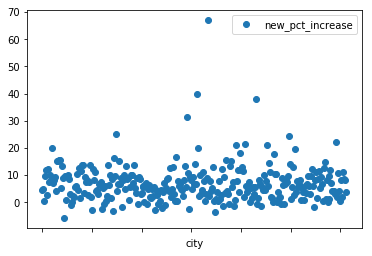

In [57]:
df.plot(x='city', y='new_pct_increase', style='o')